In [69]:
import pandas as pd
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

PATH = ''

In [70]:
train = pd.read_csv(PATH + 'train.csv')
valid = pd.read_csv(PATH + 'test.csv')
labelsTrain = pd.read_csv(PATH + 'train_labels.csv').iloc[:train.shape[0], :]
labelsValid = pd.read_csv(PATH + 'test_labels.csv').iloc[:valid.shape[0], :]

In [71]:
def moveCount(labels):
    k = 0
    for i in range(1, len(labels)):
        if labels[i-1] == 0 and labels[i] == 1:
            k+=1
    return k

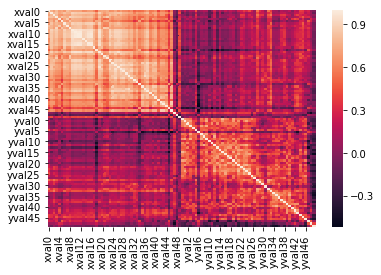

In [72]:
import seaborn
%matplotlib inline
seaborn.heatmap(train.corr())

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA

pca = PCA()
from sklearn.metrics import accuracy_score
models = {
          'logreg': LogisticRegression(), 
          'svm':SVC(kernel = 'poly'), 
          'mlp': MLPClassifier(), 
          'knn': KNeighborsClassifier(), 
          'dtree': DecisionTreeClassifier(), 
          'rfc': RandomForestClassifier(), 
          'gbm': GradientBoostingClassifier()
         }
for name, model in models.items():
    model.fit(train, labelsTrain.iloc[:, 1])
    print(name, f': {accuracy_score(labelsValid.iloc[:, 1].values, model.predict(valid))}')
    print(f'Real move count {moveCount(labelsValid.iloc[:, 1].values)} \nPredicted move count {moveCount(model.predict(valid))}')
    print('----------------------------------')

logreg : 0.5957446808510638
Real move count 14 
Predicted move count 9
----------------------------------
svm : 0.5957446808510638
Real move count 14 
Predicted move count 9
----------------------------------
mlp : 0.5531914893617021
Real move count 14 
Predicted move count 4
----------------------------------
knn : 0.7021276595744681
Real move count 14 
Predicted move count 13
----------------------------------
dtree : 0.574468085106383
Real move count 14 
Predicted move count 6
----------------------------------
rfc : 0.6808510638297872
Real move count 14 
Predicted move count 6
----------------------------------
gbm : 0.5957446808510638
Real move count 14 
Predicted move count 5
----------------------------------


In [74]:
models['knn'].predict(valid)

array([1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [75]:
labelsValid.iloc[:, 1].values

array([2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2,
       2, 2, 2], dtype=int64)